In [51]:
from vtl.Readfile import Readfile
from vtl.Photo import Photometry
from spec_id import Analyze_LH_lwa, Error,Oldest_galaxy, Gen_spec, Stack,Median_model, \
    Median_w_Error,Median_w_Error_cont,Likelihood_contours,Gen_sim, Stack_posteriors, Linear_fit , \
    Median_w_Error_95,Gen_grid,Iterative_stacking
from astropy.table import Table
from astropy.io import fits
import astropy.units as u
from astropy.cosmology import Planck13, z_at_value
from scipy.interpolate import interp1d, interp2d
from scipy.ndimage import interpolation
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
import matplotlib.patheffects as PathEffects
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
R = robjects.r
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
pandas2ri.activate()
%config InlineBackend.figure_format = 'retina'


In [2]:
def Gen_grid(DB,param):
    grid=[]
    for i in DB.index:
        x,Px = np.load('../chidat/%s_dtau_%s_pos_lwa_3.npy' % (DB['gids'][i],param))
        grid.append(Px)
    return np.array(grid)

def Gen_grid_dust(DB,param):
    grid=[]
    for i in DB.index:
        x,Px = np.load('../chidat/%s_dtau_%s_pos_lwa_dust.npy' % (DB['gids'][i],param))
        grid.append(Px)
    return np.array(grid)

In [3]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
galDB = galDB.query('ids != 14713 and ids != 38126')
lzDB = galDB.query('hi_res_specz < 1.16')
mzDB = galDB.query('1.16 < hi_res_specz < 1.3')
hzDB = galDB.query('1.3 < hi_res_specz < 1.45')
uhzDB = galDB.query('1.45 < hi_res_specz')

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [4]:
"""DATA"""
# lzDB = galDB.query('hi_res_specz < 1.16')

PZl_grid = Gen_grid(mzDB,'Z')
PTl_grid = Gen_grid(mzDB,'t')

PZl,PZx = Iterative_stacking(PZl_grid,metal)
PTl,Ptx = Iterative_stacking(PTl_grid,age)

Zmedl, Zler, Zher = np.round(Median_w_Error_95(PZl,PZx),3)
tmedl, tler, ther = np.round(Median_w_Error_95(PTl,Ptx),1)


Mstack = Stack(mzDB['gids'].values,mzDB['hi_res_specz'].values,np.arange(3400,5300,10),np.arange(3650,4950,1))
Mstack.Stack_normwmean()
Mstack.Stack_normwmean_model(Zmedl,tmedl,tau,bftau=8.3)
mstack = Mstack.mfl

No TEAL-based tasks available for this package!
../data/galaxy_flts/n17070_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n17070_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n17070_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n17070_flt: save ../data/galaxy_flts/n17070_flt.detect_seg.fits, ../data/galaxy_flts/n17070_flt.detect.cat


../data/galaxy_flts/n21156_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n21156_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n21156_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n21156_flt: save ../data/galaxy_flts/n21156_flt.detect_seg.fits, ../data/galaxy_flts/n21156_flt.detect.cat
../data/galaxy_flts/n37686_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n37686_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n37686_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n37686_flt: save ../data/galaxy_flts/n37686_flt.detect_seg.fits, ../dat

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/grizli/model.py:1023: RuntimeWarning: invalid value encountered in less
  bad = self.data['SCI'] < sigma*self.data['ERR']


../data/galaxy_flts/s35774_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s35774_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s35774_flt: photutils.source_properties - 2 objects
../data/galaxy_flts/s35774_flt: save ../data/galaxy_flts/s35774_flt.detect_seg.fits, ../data/galaxy_flts/s35774_flt.detect.cat
../data/galaxy_flts/s38785_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s38785_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s38785_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s38785_flt: save ../data/galaxy_flts/s38785_flt.detect_seg.fits, ../dat

spec_id.py:2724: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
spec_id.py:2731: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / np.sum(weigrid[i])
spec_id.py:2732: RuntimeWarning: divide by zero encountered in double_scalars
  err[i] = 1 / np.sqrt(np.sum(weigrid[i]))


../data/galaxy_flts/n17070_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n17070_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n17070_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n17070_flt: save ../data/galaxy_flts/n17070_flt.detect_seg.fits, ../data/galaxy_flts/n17070_flt.detect.cat


/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/grizli/model.py:496: RuntimeWarning: invalid value encountered in divide
  self.optimal_profile = m/m.sum(axis=0)


../data/galaxy_flts/n21156_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n21156_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n21156_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n21156_flt: save ../data/galaxy_flts/n21156_flt.detect_seg.fits, ../data/galaxy_flts/n21156_flt.detect.cat
../data/galaxy_flts/n37686_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n37686_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n37686_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n37686_flt: save ../data/galaxy_flts/n37686_flt.detect_seg.fits, ../dat

spec_id.py:601: RuntimeWarning: divide by zero encountered in power
  weigrid = np.array(errgrid).T ** (-2)


In [8]:
zldist = []
zhdist = []
tldist = []
thdist = []

for i in range(age.size):
    Mstack.Stack_normwmean_model(0.011,age[i],tau,bftau=8.3)
    zldist.append( np.sum(((Mstack.fl - Mstack.mfl)/Mstack.er)**2))    
    Mstack.Stack_normwmean_model(0.027,age[i],tau,bftau=8.3)
    zhdist.append( np.sum(((Mstack.fl - Mstack.mfl)/Mstack.er)**2))    

for i in range(metal.size):
    Mstack.Stack_normwmean_model(metal[i],1.4,tau,bftau=8.3)
    tldist.append( np.sum(((Mstack.fl - Mstack.mfl)/Mstack.er)**2))    
    Mstack.Stack_normwmean_model(metal[i],3.8,tau,bftau=8.3)
    thdist.append( np.sum(((Mstack.fl - Mstack.mfl)/Mstack.er)**2))    


../data/galaxy_flts/n17070_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n17070_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n17070_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n17070_flt: save ../data/galaxy_flts/n17070_flt.detect_seg.fits, ../data/galaxy_flts/n17070_flt.detect.cat
../data/galaxy_flts/n21156_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n21156_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n21156_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n21156_flt: save ../data/galaxy_flts/n21156_flt.detect_seg.fits, ../dat

In [12]:
zlprob = np.exp(-np.array(zldist)/2)/ np.trapz(np.exp(-np.array(zldist)/2),age)
zhprob = np.exp(-np.array(zhdist)/2)/ np.trapz(np.exp(-np.array(zhdist)/2),age)
tlprob = np.exp(-np.array(tldist)/2)/ np.trapz(np.exp(-np.array(tldist)/2),metal)
thprob = np.exp(-np.array(thdist)/2)/ np.trapz(np.exp(-np.array(thdist)/2),metal)

/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


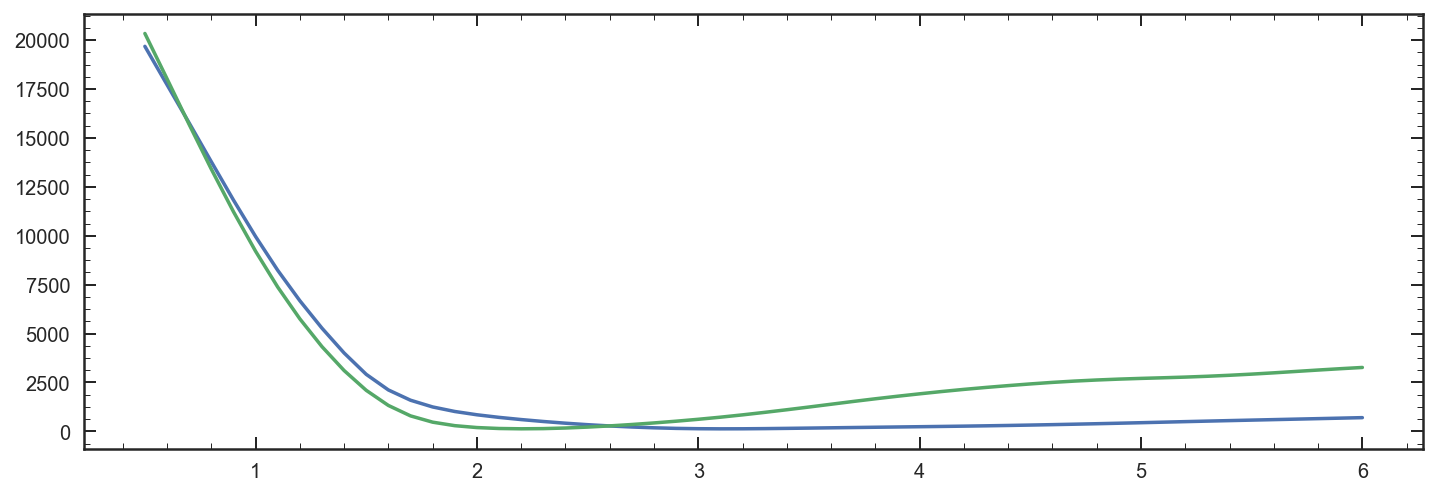

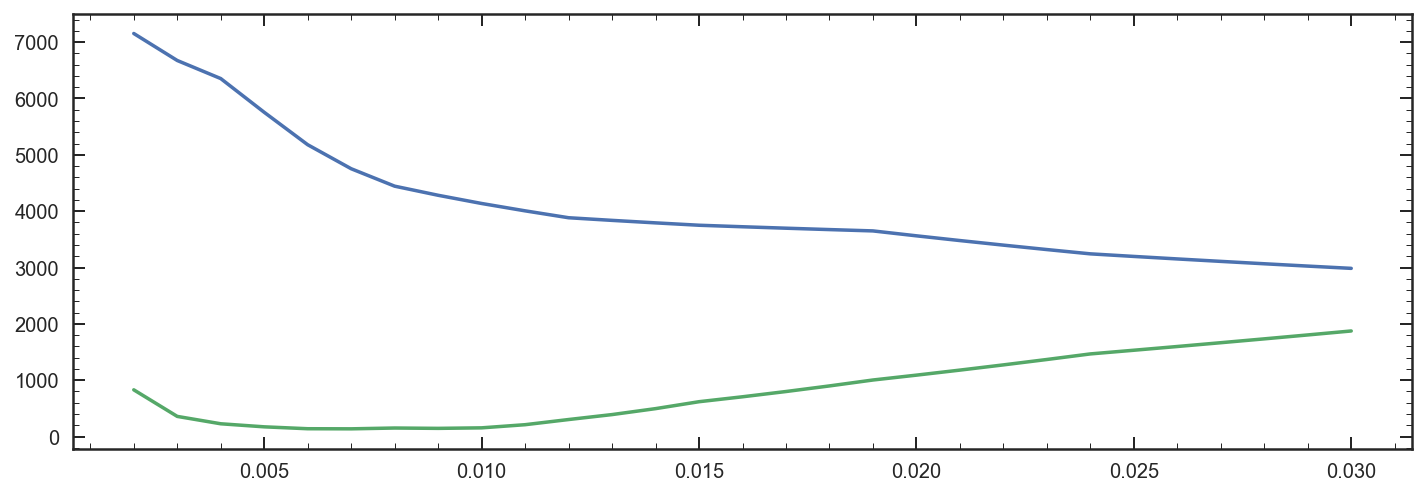

In [19]:
%matplotlib inline
plt.figure(figsize=[12,4,])
plt.plot(age,zldist)
plt.plot(age,zhdist)

plt.figure(figsize=[12,4,])
plt.plot(metal,tldist)
plt.plot(metal,thdist)

In [24]:
print age[zldist == min(zldist)]
print age[zhdist == min(zhdist)]
print metal[tldist == min(tldist)]
print metal[thdist == min(thdist)]0.011)


[ 3.1]
[ 2.2]
[ 0.03]
[ 0.007]


In [54]:
Mstack.Stack_normwmean_model(0.011,1.4,tau,bftau=8.3)
zlstack = Mstack.mfl   
Mstack.Stack_normwmean_model(0.027,3.8,tau,bftau=8.3)
zhstack = Mstack.mfl    

Mstack.Stack_normwmean_model(0.027,1.4,tau,bftau=8.3)
tlstack = Mstack.mfl   
Mstack.Stack_normwmean_model(0.011,3.8,tau,bftau=8.3)
thstack = Mstack.mfl 

../data/galaxy_flts/n17070_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n17070_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n17070_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n17070_flt: save ../data/galaxy_flts/n17070_flt.detect_seg.fits, ../data/galaxy_flts/n17070_flt.detect.cat
../data/galaxy_flts/n21156_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n21156_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n21156_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n21156_flt: save ../data/galaxy_flts/n21156_flt.detect_seg.fits, ../dat

In [55]:
"""PLOT"""

def Plot_stack(wv, fl, er, mfl1, mfl2, mfl3, mfl4, mfl5
               ,bfm,bfml,bfmh,bfa,bfal,bfah,window=[],save_plot=False,plot_name=''):
    
    gs = gridspec.GridSpec(2,1,hspace=0)
    
    plt.figure(figsize=[8,14])
    plt.subplot(gs[0])
    plt.errorbar(wv,fl * 1000,er * 1000,color='#404040',fmt='o',ms = 4,elinewidth=2)
    plt.plot(wv,mfl1 * 1000,color='#ca0020',
             label='Z=%s Z$_\odot$,t=%s Gyrs' % (np.round(bfm/0.019,2),bfa),zorder = 5,linewidth = 2)
    plt.plot(wv,mfl2 * 1000,color='#f4a582',zorder = 5,linewidth = 2,
            label='Z=%s Z$_\odot$,t=%s Gyrs' % (np.round(bfml/0.019,2),bfa) )
    plt.plot(wv,mfl3 * 1000,color='k',zorder = 5,linewidth = 2,
            label='Z=%s Z$_\odot$,t=%s Gyrs' % (np.round(bfmh/0.019,2),bfa))
    
    plt.axvline(3934.777,linestyle='--', alpha=.3)
    plt.axvline(3969.588,linestyle='--', alpha=.3)
    plt.axvline(4102.89,linestyle='--', alpha=.3)
    plt.axvline(4305.61,linestyle='--', alpha=.3)
    plt.axvline(4341.68,linestyle='--', alpha=.3)
    plt.axvline(4862.68,linestyle='--', alpha=.3)
#     plt.axvline(5176.7,linestyle='--', alpha=.3)
    plt.axvspan(3910, 3980, color='k', alpha=.1)
    plt.axvspan(3980, 4030, color='k', alpha=.1)
    plt.axvspan(4080, 4120, color='k', alpha=.1)
    plt.axvspan(4250, 4380, color='k', alpha=.1)
    plt.axvspan(4810, 4910, color='k', alpha=.1)
#     plt.axvspan(5120, 5240, color='k', alpha=.1)
    plt.text(3900,window[3]+.05,'Ca HK',fontsize=15)
    plt.text(4080,window[3]+.05,'H$\delta$',fontsize=15)
    plt.text(4280,window[3]+.05,'G+H$\gamma$',fontsize=15)
    plt.text(4830,window[3]+.05,'H$\\beta$',fontsize=15)
#     plt.text(5160,window[3]+.05,'Mgb',fontsize=15)
    plt.ylim(0.01,window[2])
    plt.xlim(window[0],window[1])
    plt.ylabel('F$_\lambda$',size=20)
    plt.xlabel('Restframe Wavelength ($\\rm \AA$)',size=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.gcf().subplots_adjust(bottom=0.235)
    plt.legend(loc=4,fontsize=20)
    plt.minorticks_on()
    
    plt.subplot(gs[1])
    plt.errorbar(wv,fl * 1000,er * 1000,color='#404040',fmt='o',ms = 4,elinewidth=2)
    plt.plot(wv,mfl1 * 1000,color='#ca0020',
             label='Z=%s Z$_\odot$,t=%s Gyrs' % (np.round(bfm/0.019,2),bfa),zorder = 5,linewidth = 2)
    plt.plot(wv,mfl4 * 1000,color='#f4a582',zorder = 5,linewidth = 2,
            label='Z=%s Z$_\odot$,t=%s Gyrs' % (np.round(bfm/0.019,2),bfal))
    plt.plot(wv,mfl5 * 1000,color='k',zorder = 5,linewidth = 2,
            label='Z=%s Z$_\odot$,t=%s Gyrs' % (np.round(bfm/0.019,2),bfah))
    
    plt.axvline(3934.777,linestyle='--', alpha=.3)
    plt.axvline(3969.588,linestyle='--', alpha=.3)
    plt.axvline(4102.89,linestyle='--', alpha=.3)
    plt.axvline(4305.61,linestyle='--', alpha=.3)
    plt.axvline(4341.68,linestyle='--', alpha=.3)
    plt.axvline(4862.68,linestyle='--', alpha=.3)
#     plt.axvline(5176.7,linestyle='--', alpha=.3)
    plt.axvspan(3910, 3980, color='k', alpha=.1)
    plt.axvspan(3980, 4030, color='k', alpha=.1)
    plt.axvspan(4080, 4120, color='k', alpha=.1)
    plt.axvspan(4250, 4380, color='k', alpha=.1)
    plt.axvspan(4810, 4910, color='k', alpha=.1)
#     plt.axvspan(5120, 5240, color='k', alpha=.1)
    plt.ylim(0.0,window[2])
    plt.xlim(window[0],window[1])
    plt.ylabel('F$_\lambda$',size=20)
    plt.xlabel('Restframe Wavelength ($\\rm \AA$)',size=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.gcf().subplots_adjust(bottom=0.235)
    plt.legend(loc=4,fontsize=20)
    plt.minorticks_on()
    
    if save_plot == True:
        plt.savefig(plot_name,bbox_inches = 'tight')
    else:
        plt.show()
    plt.close()

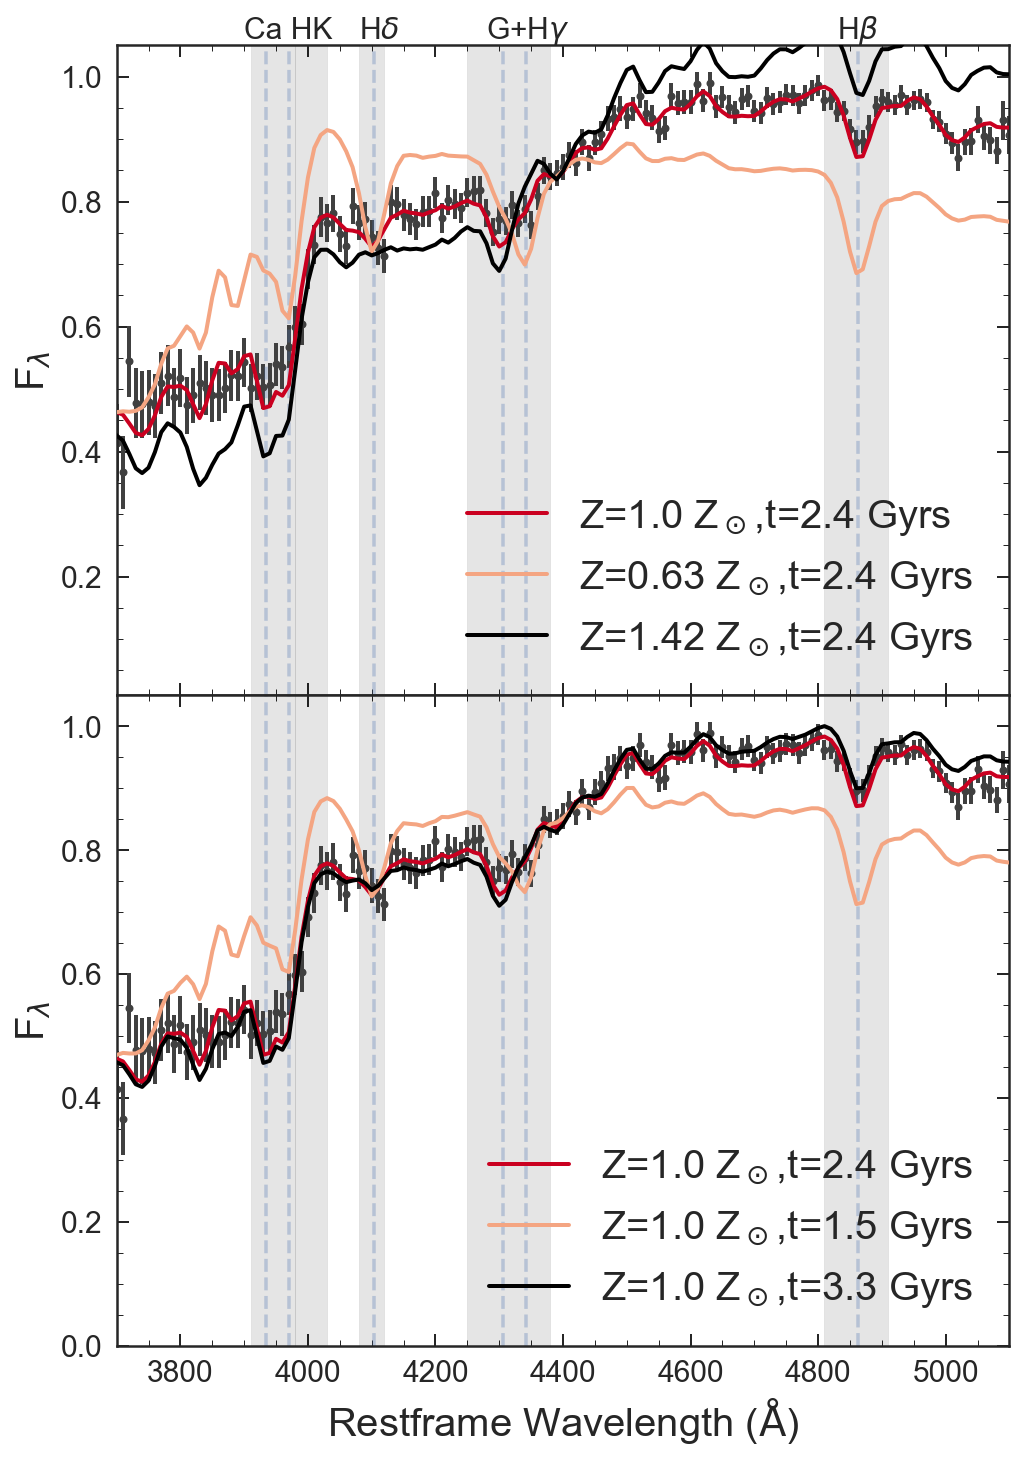

In [56]:
%matplotlib inline

Plot_stack(Mstack.wv, Mstack.fl, Mstack.er, mstack, zlstack, zhstack, tlstack, thstack, 
           0.019,0.012,0.027,2.4,1.5,3.3,window=[3700,5100,1.05,1.01],save_plot=False,
           plot_name='../plots/stack_param_shift.pdf')

In [12]:
m_pos=np.zeros([len(mzDB['gids'].values),age.size])
a_pos=np.zeros([len(mzDB['gids'].values),metal.size])

for i in range(len(mzDB.index)):
    P = np.load('../chidat/%s_dtau_tZ_pos_lwa_3.npy' % mzDB['gids'][mzDB.index[i]])
    m_pos[i] = P.T[17]/np.trapz(P.T[17],age)
    a_pos[i] = P[19]/np.trapz(P[19],metal)


In [10]:
age[19]

2.3999999999999995

In [22]:
P.T[0].shape

(56,)

In [31]:
Psum = np.zeros([age.size,metal.size])
for i in range(len(mzDB.index)):
    P = np.load('../chidat/%s_dtau_tZ_pos_lwa_3.npy' % mzDB['gids'][mzDB.index[i]])
    Psum += P

In [32]:
Pw = np.zeros(len(mzDB.index))
j=0
for i in range(len(mzDB.index)):
    Ps = np.zeros([age.size,metal.size])
    for ii in range(len(mzDB.index)):
        if i != ii:
            P = np.load('../chidat/%s_dtau_tZ_pos_lwa_3.npy' % mzDB['gids'][mzDB.index[ii]])
            Ps += P
            
    Pw[i] = 1 / np.sum((Ps - Psum)**2)

In [33]:
Pw

array([  1.43923388e-06,   9.64571418e-07,   1.06428919e-06,
         8.08626935e-07,   2.89885064e-06,   3.02078421e-06,
         1.39059705e-06,   1.07435510e-07])

In [34]:
Ssum = np.zeros([age.size,metal.size])
for i in range(len(mzDB.index)):
    P = np.load('../chidat/%s_dtau_tZ_pos_lwa_3.npy' % mzDB['gids'][mzDB.index[i]])
    Ssum += P * Pw[i]

In [38]:
metal.shape

(29,)

In [39]:
C = np.trapz(np.trapz(Ssum.T, age, axis=1), metal)
PS= Ssum / C

In [77]:
def Smooth_dist(y_o,x_o,resampling = 250):
    ksmooth = importr('KernSmooth')
    del_x = x_o[1] - x_o[0]

    ### resample
    x = np.linspace(x_o[0],x_o[-1],resampling)
    y = interp1d(x_o,y_o)(x)
   
    ### select bandwidth
    H = ksmooth.dpik(x)
    
    fx = ksmooth.locpoly(x,y,bandwidth = H)
    X = np.array(fx[0])
    iFX = np.array(fx[1])
    Fx = interp1d(X,iFX)(x)    
    Fx[Fx<0]=0
        
    return interp1d(x,Fx)(x_o)


In [64]:
interp1d

29
56


In [85]:
IPS = np.ones(PS.shape)
nPS = PS
for u in range(5):
    smPS = np.zeros(nPS.shape)
    IPS *= nPS
    for i in range(len(IPS)):
        smPS[i] = Smooth_dist(IPS[i],metal)

    C = np.trapz(np.trapz(smPS.T, age, axis=1), metal)
    IPS = smPS / C


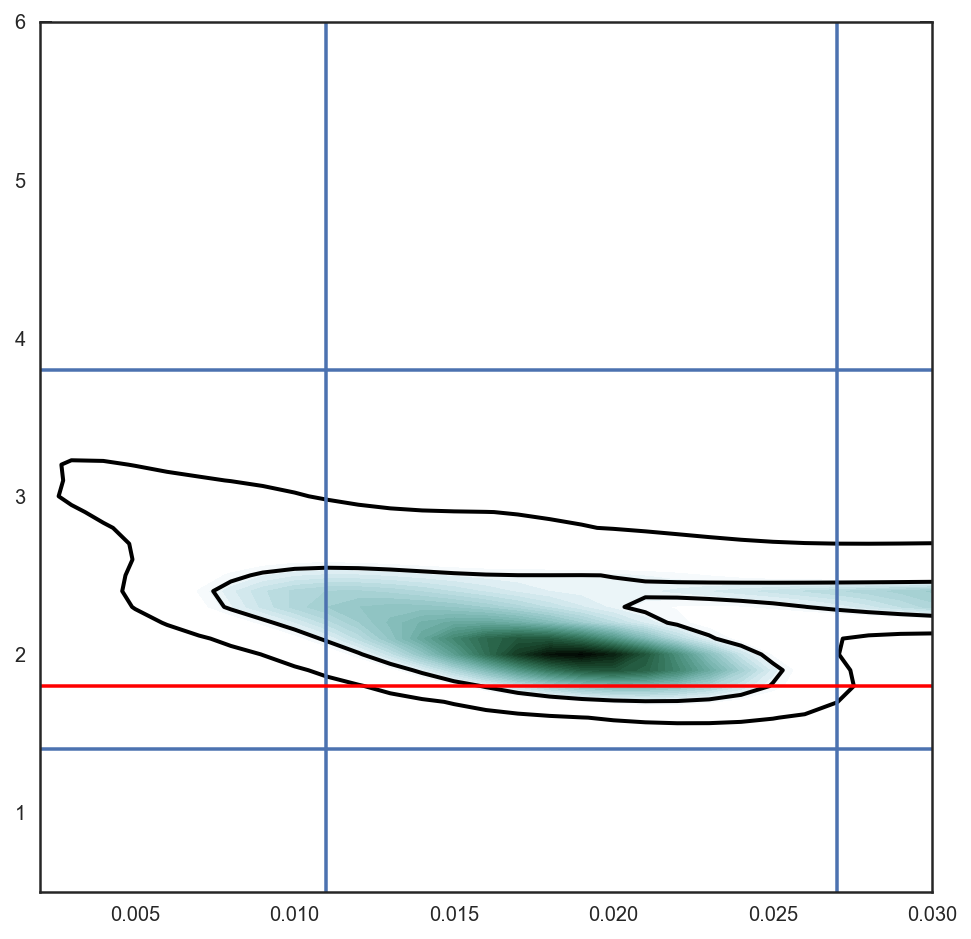

In [86]:
onesig,twosig = Likelihood_contours(age,metal,IPS)
levels = np.array([twosig,onesig])
plt.figure(figsize=[8,8])
plt.contour(M,A,IPS,levels,colors='k',linewidths=2)
plt.contourf(M,A,IPS,40,cmap=cmap)
plt.axvline(0.011)
plt.axvline(0.027)
plt.axhline(1.4)
plt.axhline(3.8)
plt.axhline(1.8,color='r')

In [24]:
P_e = np.ones([PZl.size,PTl.size])

In [25]:
for i in range(len(P_e)):
    P_e[i] *= PZl[i]
for i in range(len(P_e)):
    P_e.T[i] *= PTl[i]

In [30]:
C = np.trapz(np.trapz(P_e.T, Ptx, axis=1), PZx)
P_e = P_e / C

In [10]:
Ml,Al=np.meshgrid(PZx,Ptx)

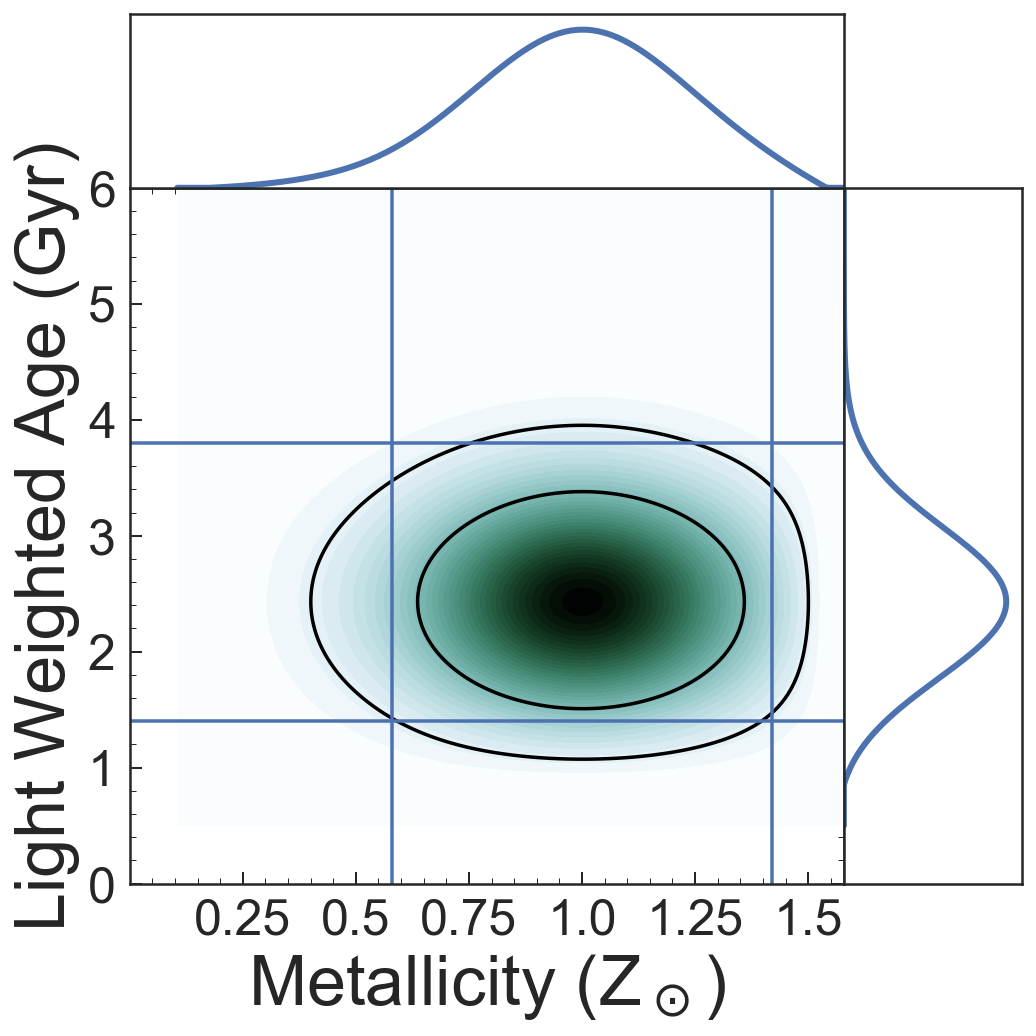

In [53]:
%matplotlib inline
onesig,twosig = Likelihood_contours(Ptx,PZx,P_e.T)
levels = np.array([twosig,onesig])

gs = gridspec.GridSpec(2,2,height_ratios=[1,4],width_ratios=[4,1],hspace=0,wspace=0)
plt.figure(figsize=[8,8])

plt.subplot(gs[2])
plt.contour(Ml,Al,P_e.T,levels,colors='k', linewidth=2)
plt.contourf(Ml,Al,P_e.T,40,cmap=cmap)
plt.axis([0,0.03,0,6])
plt.axvline(0.011)
plt.axvline(0.027)
plt.axhline(1.4)
plt.axhline(3.8)
plt.xlabel('Metallicity (Z$_\odot$)',size=35)
plt.ylabel('Light Weighted Age (Gyr)',size=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xticks([ 0.00475,  0.0095 ,  0.01425,  0.019  ,  0.02375,  0.0285 ],[0.25,.5,0.75,1.0,1.25,1.5])

plt.subplot(gs[0])
plt.plot(PZx,PZl,linewidth=3)
plt.xticks([])
plt.yticks([])
plt.xlim(0,0.03)
plt.ylim(0,max(PZl)*1.1)

plt.subplot(gs[3])
plt.plot(PTl,Ptx,linewidth=3)
plt.xticks([])
plt.yticks([])
plt.ylim(0,6)
plt.xlim(0,max(PTl)*1.1)
plt.show()